# Project -->> Dominos Data Analysis

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('dominos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [20]:
df.shape

(15000, 3)

In [21]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [22]:
df.duplicated().sum()

0

# Data Cleaning

In [24]:
# converting column to datetime
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])
print(df['order_placed_at'])
print(df['order_delivered_at'])

0       2023-03-01 00:00:59
1       2023-03-01 00:03:59
2       2023-03-01 00:07:22
3       2023-03-01 00:07:47
4       2023-03-01 00:09:03
                ...        
14995   2023-03-27 23:37:05
14996   2023-03-27 23:47:38
14997   2023-03-27 23:50:16
14998   2023-03-27 23:52:44
14999   2023-03-27 23:58:20
Name: order_placed_at, Length: 15000, dtype: datetime64[ns]
0       2023-03-01 00:18:07.443132
1       2023-03-01 00:19:34.925241
2       2023-03-01 00:22:28.291385
3       2023-03-01 00:46:19.019399
4       2023-03-01 00:25:13.619056
                   ...            
14995   2023-03-27 23:52:37.409378
14996   2023-03-28 00:04:22.672912
14997   2023-03-28 00:05:40.676238
14998   2023-03-28 00:08:41.810358
14999   2023-03-28 00:13:42.499311
Name: order_delivered_at, Length: 15000, dtype: datetime64[ns]


In [25]:
# calculating delivery time in minutes
df['delivery_time'] =  df['order_delivered_at'] - df['order_placed_at'] 
df['delivery_minutes'] = df['delivery_time'].dt.total_seconds()/ 60

In [26]:
df['delivery_minutes']

0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Name: delivery_minutes, Length: 15000, dtype: float64

In [27]:
# # Extracting time based features
df['order_hour'] = df['order_placed_at'].dt.hour
df['day_of_week'] = df['order_placed_at'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

In [28]:
# detecting outliers 
outlier_threshold = 120 # assuming this as an error
outliers = df[df['delivery_minutes'] > outlier_threshold]
print(f"Number of outliers (> {outlier_threshold} mins): {len(outliers)}")
print(f"Percentage of data removed: {len(outliers)/len(df)*100:.2f}%")

Number of outliers (> 120 mins): 69
Percentage of data removed: 0.46%


In [29]:
df_clean = df[df['delivery_minutes'] <= outlier_threshold].copy()
df_clean

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_minutes,order_hour,day_of_week,is_weekend
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,17.140719,0,Wednesday,False
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,15.598754,0,Wednesday,False
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,15.104856,0,Wednesday,False
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,38.533657,0,Wednesday,False
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,16.176984,0,Wednesday,False
...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,0 days 00:15:32.409378,15.540156,23,Monday,False
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,0 days 00:16:44.672912,16.744549,23,Monday,False
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,0 days 00:15:24.676238,15.411271,23,Monday,False
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,0 days 00:15:57.810358,15.963506,23,Monday,False


# Univariate analysis

In [31]:
# Descriptive statistics for clean data
print(df_clean['delivery_minutes'].describe())

count    14931.000000
mean        17.760636
std          7.144206
min         15.000010
25%         15.272876
50%         15.789953
75%         17.241652
max        118.026424
Name: delivery_minutes, dtype: float64


Text(0.5, 0, 'Minutes')

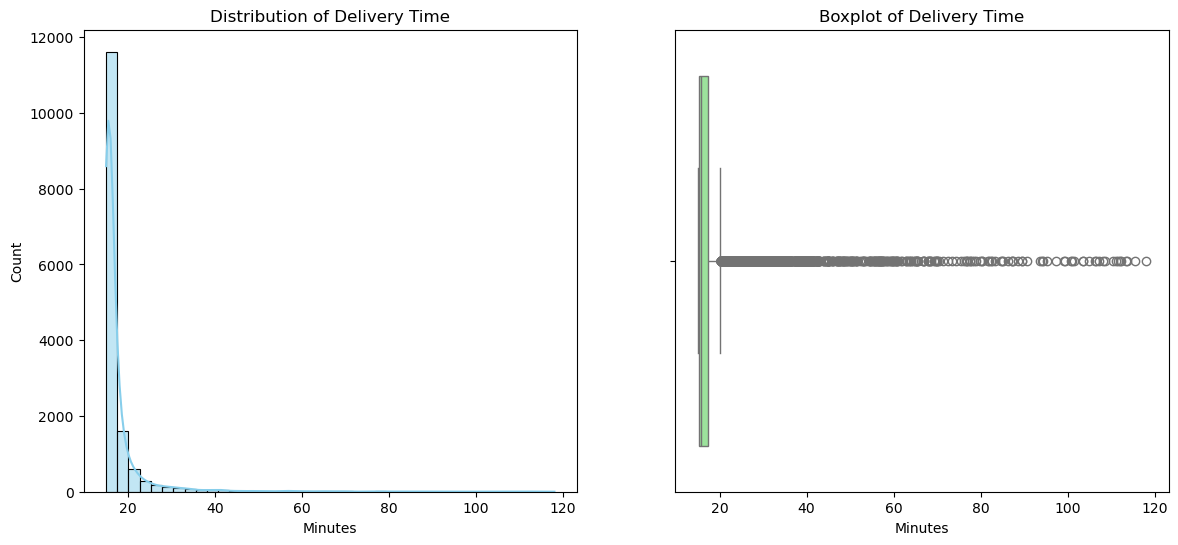

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Delivery Minutes Distribution

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['delivery_minutes'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Minutes')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['delivery_minutes'], color='lightgreen')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Minutes')

**Observation:**
- Distribution is Highly right-skewed. The vast majority of orders are delivered very quickly.
- Mean: 17.76 minutes.
- Median: 15.79 minutes.
- Consistency: 75% of orders are delivered within 17.2 minutes.

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_21772\2194832144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour', data=df_clean, palette='viridis')


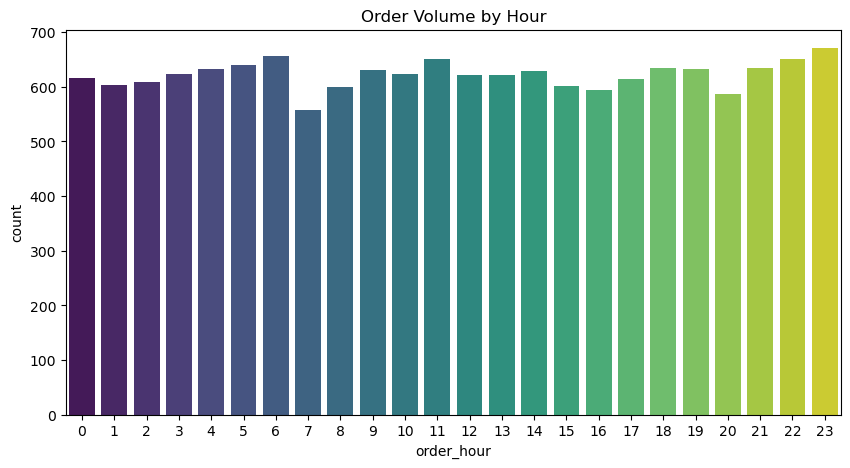

In [34]:
# Order Volume (Hour)
plt.figure(figsize=(10, 5))
sns.countplot(x='order_hour', data=df_clean, palette='viridis')
plt.title('Order Volume by Hour')
plt.show()

**Observation:**
- There is a significant spike in orders late at night (Midnight - 2 AM)
  and a smaller peak in the late morning (10 AM - 11 AM).
-  Order volume is relatively stable across the week, with no drastic drops or spikes on weekends.

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_21772\3992993600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df_clean, order=days_order, palette='muted')


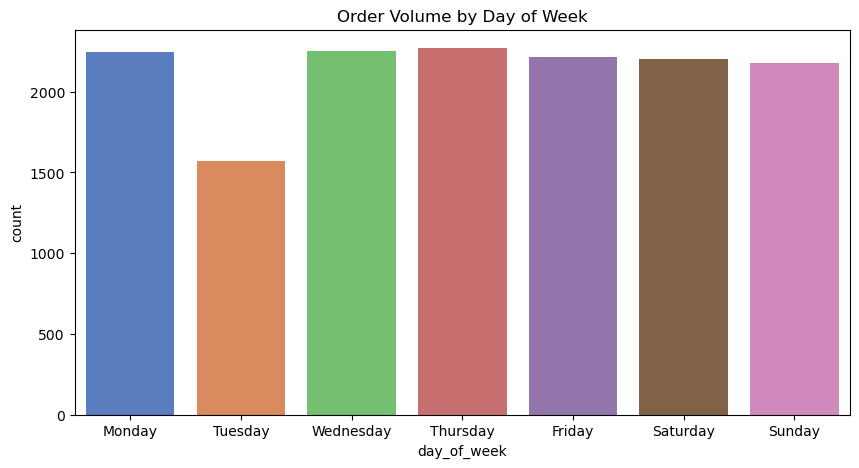

In [36]:
# Order Volume (Day)
plt.figure(figsize=(10, 5))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day_of_week', data=df_clean, order=days_order, palette='muted')
plt.title('Order Volume by Day of Week')
plt.show()

# Bi-Variate Analysis

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_21772\1322434171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_hour', y='delivery_minutes', data=df_clean, palette='coolwarm')


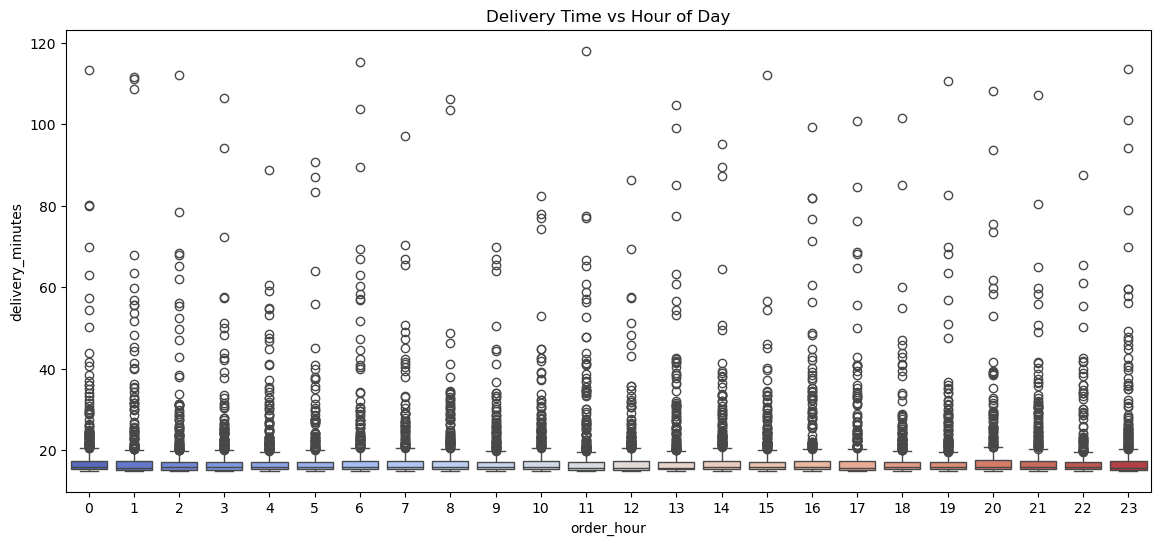

In [38]:
# Delivery Time vs Hour
plt.figure(figsize=(14, 6))
sns.boxplot(x='order_hour', y='delivery_minutes', data=df_clean, palette='coolwarm')
plt.title('Delivery Time vs Hour of Day')
plt.show()

**Observation:**
- boxplot shows that median delivery times are remarkably consistent across all hours of the day.
-  Even during high-volume hours (Midnight), the delivery system maintains its speed (median ~15-16 mins)

C:\Users\$IdDhartH\AppData\Local\Temp\ipykernel_21772\3627651671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='delivery_minutes', data=df_clean, order=days_order, palette='pastel')


<function matplotlib.pyplot.show(close=None, block=None)>

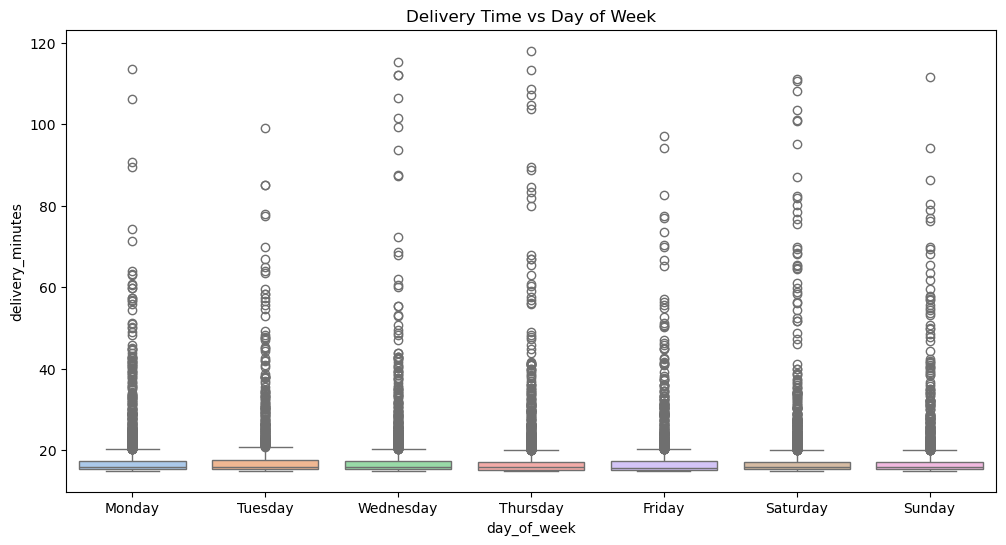

In [40]:
# Delivery Time vs Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='delivery_minutes', data=df_clean, order=days_order, palette='pastel')
plt.title('Delivery Time vs Day of Week')
plt.show

**Observation:**
- Operations perform equally well on weekends as they do on weekdays.

In [42]:
# Multivarriate analysis

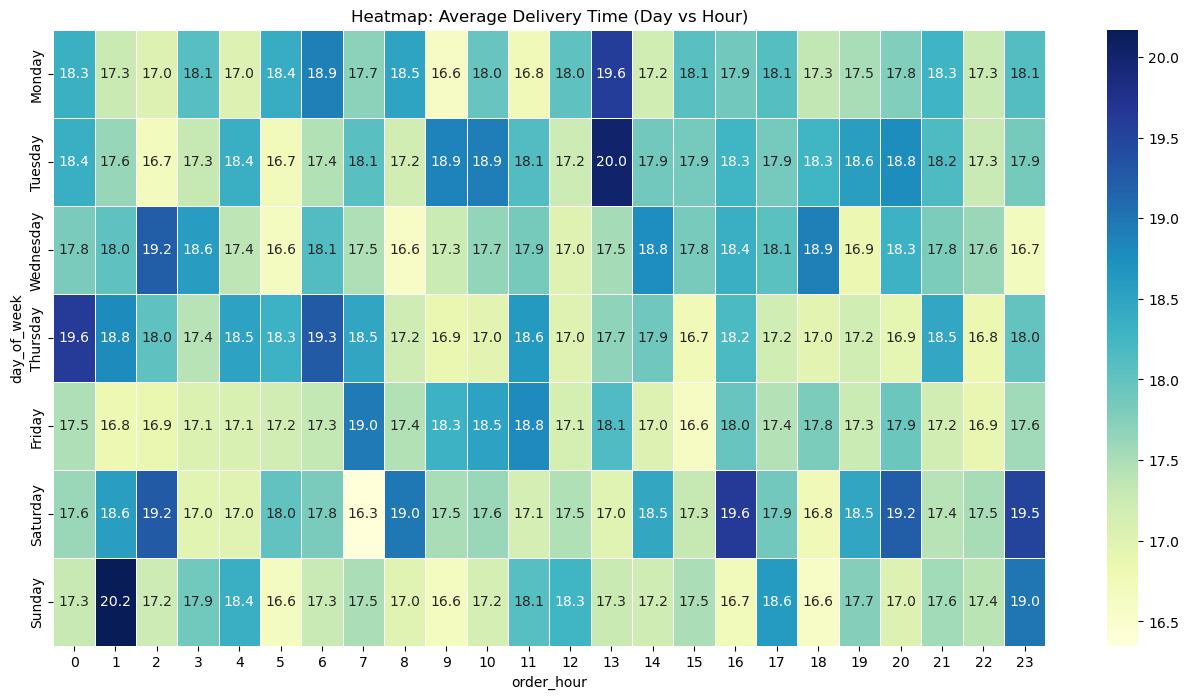

In [43]:
pivot_table = df_clean.pivot_table(values='delivery_minutes', index='day_of_week', columns='order_hour', aggfunc='mean')
pivot_table = pivot_table.reindex(days_order)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap: Average Delivery Time (Day vs Hour)')
plt.savefig('multivariate_heatmap.png')

**Observation:**
- A heatmap of average delivery times by Day and Hour confirms the bivariate findings.
- The grid is uniform, with no specific "danger zones" (red blocks) where delivery times consistently degrade.
- The operation is highly robust to temporal factors.

# Hypothesis Testing

In [46]:
from scipy import stats
#Hypothesis 1: Mean delivery time is greater than 30 minutes
# H0: mu <= 30
# H1: mu > 30
t_stat1, p_val1 = stats.ttest_1samp(df_clean['delivery_minutes'], 30, alternative='greater')
print(f"Test 1 (Mean > 30 min): T-stat={t_stat1:.4f}, P-val={p_val1:.4e}")

Test 1 (Mean > 30 min): T-stat=-209.3386, P-val=1.0000e+00


**Observation:**
- P-value $\approx$ 1.0 (Fail to Reject Null).
-  We have strong evidence that the mean delivery time is not greater than 30 minutes. It is significantly lower.

In [48]:
# Hypothesis 2: Weekend delivery times differ from Weekdays
# H0: mu_weekend == mu_weekday
# H1: mu_weekend != mu_weekday
weekend = df_clean[df_clean['is_weekend']]['delivery_minutes']
weekday = df_clean[~df_clean['is_weekend']]['delivery_minutes']
t_stat2, p_val2 = stats.ttest_ind(weekend, weekday)
print(f"Test 2 (Weekend vs Weekday): T-stat={t_stat2:.4f}, P-val={p_val2:.4f}")
print(f"Mean Weekend: {weekend.mean():.2f}, Mean Weekday: {weekday.mean():.2f}")

Test 2 (Weekend vs Weekday): T-stat=-0.2530, P-val=0.8003
Mean Weekend: 17.74, Mean Weekday: 17.77


**Observation:**
- P-value $\approx$ 0.80 (Fail to Reject Null).
- There is no statistical difference in performance between weekends and weekdays.

In [50]:
# Hypothesis 3: Peak vs Off-Peak
# Peak: 12-14 (Lunch), 19-21 (Dinner)
def get_period(h):
    if 12 <= h <= 14 or 19 <= h <= 21:
        return 'Peak'
    return 'Off-Peak'
df_clean['period'] = df_clean['order_hour'].apply(get_period)
peak = df_clean[df_clean['period']=='Peak']['delivery_minutes']
offpeak = df_clean[df_clean['period']=='Off-Peak']['delivery_minutes']
t_stat3, p_val3 = stats.ttest_ind(peak, offpeak)

print(f"Test 3 (Peak vs Off-Peak): T-stat={t_stat3:.4f}, P-val={p_val3:.4f}")
print(f"Mean Peak: {peak.mean():.2f}, Mean Off-Peak: {offpeak.mean():.2f}")

Test 3 (Peak vs Off-Peak): T-stat=0.2458, P-val=0.8058
Mean Peak: 17.79, Mean Off-Peak: 17.75


**Observation:**
- P-value $\approx$ 0.81 (Fail to Reject Null).
- There is no statistical difference in delivery speed during peak hours compared to off-peak hours, indicating effective staffing or capacity planning.